# Decision Tree - Fraud Check Problem

## ------------------------------------------------------------------------------------------------------------------------

## Problem Statement :- Use decision trees to prepare a model on fraud data .
## Treating those who have taxable_income <= 30000 as "Risky" and others are "Good".

## 1.Importing Libraries :

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## 2. Importing Dataset :

In [67]:
fraud_data = pd.read_csv('Fraud_check.csv',sep=',')
fraud_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


## 3. Data Understanding :

### 3.1 Data Description :

* **Undergrad** : person is under graduated or not
* **Marital.Status** : marital status of a person
* **Taxable.Income** : Taxable income is the amount of how much tax an individual owes to the government 
* **Work Experience** : Work experience of an individual person
* **Urban** : Whether that person belongs to urban area or not

### 3.2 Initial Analysis :

In [68]:
fraud_data.shape

(600, 6)

In [69]:
fraud_data.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [70]:
fraud_data.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

## 4. Data Preparation :

In [71]:
# Renaming columns :

fraud_data.columns = ['undergrad','marital_status','taxable_income','city_population','work_experience','urban']
fraud_data.head()

,undergrad,marital_status,taxable_income,city_population,work_experience,urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [72]:
# Creating a target column
fraud_data['target'] = 'N/A'
fraud_data.head()

,undergrad,marital_status,taxable_income,city_population,work_experience,urban,target
0,NO,Single,68833,50047,10,YES,N/A
1,YES,Divorced,33700,134075,18,YES,N/A
2,NO,Married,36925,160205,30,YES,N/A
3,YES,Single,50190,193264,15,YES,N/A
4,NO,Married,81002,27533,28,NO,N/A


In [73]:
# Above Mentioned that the target variable is based on taxable income paid.
# As in the statement it is mentioned that those who have taxable_income <= 30000 as "Risky" and others are "Good".
# So the conditions are taxable_income > 30000 - "Good" and taxable_income <=30000 - "Risky"

for i in range(0,fraud_data.shape[0]):
    if fraud_data.taxable_income[i] > 30000:
        fraud_data.target[i] = 'Good'
    else:
        fraud_data.target[i] = 'Risky'

In [74]:
fraud_data.head(20)

,undergrad,marital_status,taxable_income,city_population,work_experience,urban,target
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
5,NO,Divorced,33329,116382,0,NO,Good
6,NO,Divorced,83357,80890,8,YES,Good
7,YES,Single,62774,131253,3,YES,Good
8,NO,Single,83519,102481,12,YES,Good
9,YES,Divorced,98152,155482,4,YES,Good


In [75]:
fraud_data.dtypes

undergrad          object
marital_status     object
taxable_income      int64
city_population     int64
work_experience     int64
urban              object
target             object
dtype: object

## 5. Data Pre-Processing :

### 5.1 Data Transformation :

In [76]:
fraud_data_copy = fraud_data.copy()
fraud_data_copy.head()

,undergrad,marital_status,taxable_income,city_population,work_experience,urban,target
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


In [77]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
fraud_data_copy['undergrad']      = le.fit_transform(fraud_data_copy['undergrad'])
fraud_data_copy['marital_status'] = le.fit_transform(fraud_data_copy['marital_status'])
fraud_data_copy['urban']          = le.fit_transform(fraud_data_copy['urban'])
fraud_data_copy['target']         = le.fit_transform(fraud_data_copy['target'])

In [78]:
fraud_data_copy.head(10)

,undergrad,marital_status,taxable_income,city_population,work_experience,urban,target
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0
5,0,0,33329,116382,0,0,0
6,0,0,83357,80890,8,1,0
7,1,2,62774,131253,3,1,0
8,0,2,83519,102481,12,1,0
9,1,0,98152,155482,4,1,0


##### NOTE :- In the above transforation technique :- For the columns - undergrad,urban
##### Yes is transformed as '1' and No is transformed as '0'.

#### Marital status transformation

In [79]:
fraud_data['marital_status'].unique()

array(['Single', 'Divorced', 'Married'], dtype=object)

In [80]:
fraud_data_copy['marital_status'].unique()

array([2, 0, 1])

* Divorced - 0 
* Married  - 1
* Singe    - 2

#### Target column transformation :

In [81]:
fraud_data['target'].unique()

array(['Good', 'Risky'], dtype=object)

In [82]:
fraud_data_copy['target'].unique()

array([0, 1])

* Good  - 0
* Risky - 1

### 5.2 Checking dataset after transformation :

In [83]:
fraud_data_copy.dtypes

undergrad          int32
marital_status     int32
taxable_income     int64
city_population    int64
work_experience    int64
urban              int32
target             int32
dtype: object

In [84]:
fraud_data_copy.isna().sum()

undergrad          0
marital_status     0
taxable_income     0
city_population    0
work_experience    0
urban              0
target             0
dtype: int64

## 6. Model Building :

In [96]:
X = fraud_data_copy.drop(labels= 'target',axis=1)
y = fraud_data_copy[['target']]

In [133]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=12)

In [134]:
X_train.shape, y_train.shape

((480, 6), (480, 1))

In [135]:
X_test.shape, y_test.shape

((120, 6), (120, 1))

## 7. Model Training :

In [201]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [137]:
dt_model_1 = DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=5)
dt_model_1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

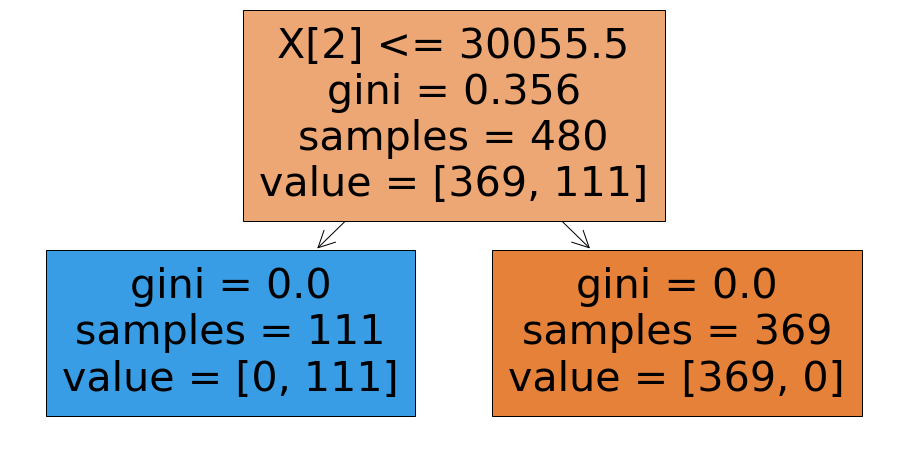

In [138]:
from sklearn.tree import plot_tree
plt.figure(figsize=(16,8))
plot_tree(dt_model_1,filled = True)
plt.show()

In [139]:
dt_model_2 = DecisionTreeClassifier(criterion='gini',splitter='random',max_depth=5)
dt_model_2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, splitter='random')

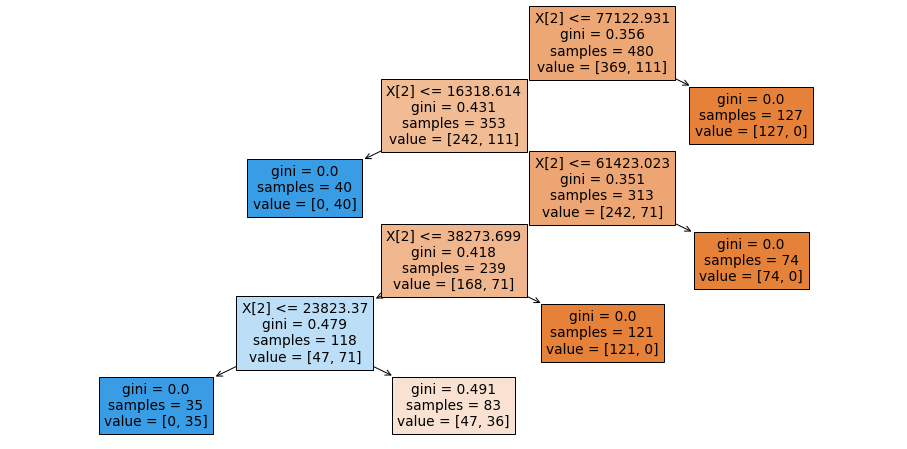

In [140]:
plt.figure(figsize=(16,8))
plot_tree(dt_model_2,filled = True)
plt.show()

In [141]:
dt_model_3 = DecisionTreeClassifier(criterion='entropy',splitter='random',max_depth=5)
dt_model_3.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, splitter='random')

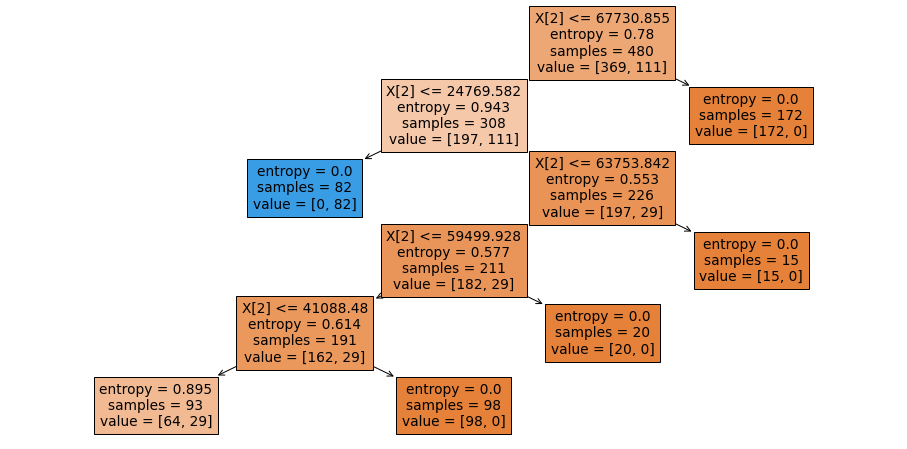

In [202]:
plt.figure(figsize=(16,8))
plot_tree(dt_model_3,filled = True)
plt.show()

In [142]:
dt_model_4 = DecisionTreeClassifier(criterion='entropy',splitter='best',max_depth=5)
dt_model_4.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

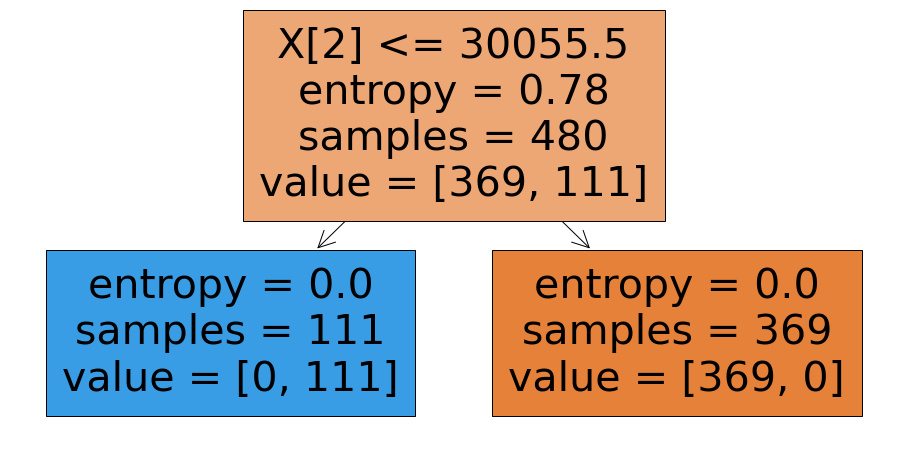

In [203]:
plt.figure(figsize=(16,8))
plot_tree(dt_model_4,filled = True)
plt.show()

## 8. Model Testing :

In [143]:
# Training data :

y_predict_train_1 = dt_model_1.predict(X_train)
y_predict_train_2 = dt_model_2.predict(X_train)
y_predict_train_3 = dt_model_3.predict(X_train)
y_predict_train_4 = dt_model_4.predict(X_train)

# Test data :

y_predict_test_1 = dt_model_1.predict(X_test)
y_predict_test_2 = dt_model_2.predict(X_test)
y_predict_test_3 = dt_model_3.predict(X_test)
y_predict_test_4 = dt_model_4.predict(X_test)

## 9. Model Evaluation

In [144]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,classification_report,confusion_matrix

### 9.1 Training data :

####  Training Model -1

In [145]:
print('TRAINING MODEL - 1')
print('-------------------------------')
print('Accuracy Score        :',round(accuracy_score(y_train,y_predict_train_1),4))
print('Precision Score       :',round(precision_score(y_train,y_predict_train_1),4))
print('Recall Score          :',round(recall_score(y_train,y_predict_train_1),4))
print('Confusion Matrix      :\n',confusion_matrix(y_train,y_predict_train_1))
print('Classification Report :\n',classification_report(y_train,y_predict_train_1))

TRAINING MODEL - 1
-------------------------------
Accuracy Score        : 1.0
Precision Score       : 1.0
Recall Score          : 1.0
Confusion Matrix      :
 [[369   0]
 [  0 111]]
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       369
           1       1.00      1.00      1.00       111

    accuracy                           1.00       480
   macro avg       1.00      1.00      1.00       480
weighted avg       1.00      1.00      1.00       480



#### Training Model -2

In [146]:
print('TRAINING MODEL - 2')
print('-------------------------------')
print('Accuracy Score        :',round(accuracy_score(y_train,y_predict_train_2),4))
print('Precision Score       :',round(precision_score(y_train,y_predict_train_2),4))
print('Recall Score          :',round(recall_score(y_train,y_predict_train_2),4))
print('Confusion Matrix      :\n',confusion_matrix(y_train,y_predict_train_2))
print('Classification Report :\n',classification_report(y_train,y_predict_train_2))

TRAINING MODEL - 2
-------------------------------
Accuracy Score        : 0.925
Precision Score       : 1.0
Recall Score          : 0.6757
Confusion Matrix      :
 [[369   0]
 [ 36  75]]
Classification Report :
               precision    recall  f1-score   support

           0       0.91      1.00      0.95       369
           1       1.00      0.68      0.81       111

    accuracy                           0.93       480
   macro avg       0.96      0.84      0.88       480
weighted avg       0.93      0.93      0.92       480



#### Training Model -3

In [147]:
print('TRAINING MODEL - 3')
print('-------------------------------')
print('Accuracy Score        :',round(accuracy_score(y_train,y_predict_train_3),4))
print('Precision Score       :',round(precision_score(y_train,y_predict_train_3),4))
print('Recall Score          :',round(recall_score(y_train,y_predict_train_3),4))
print('Confusion Matrix      :\n',confusion_matrix(y_train,y_predict_train_3))
print('Classification Report :\n',classification_report(y_train,y_predict_train_3))

TRAINING MODEL - 3
-------------------------------
Accuracy Score        : 0.9396
Precision Score       : 1.0
Recall Score          : 0.7387
Confusion Matrix      :
 [[369   0]
 [ 29  82]]
Classification Report :
               precision    recall  f1-score   support

           0       0.93      1.00      0.96       369
           1       1.00      0.74      0.85       111

    accuracy                           0.94       480
   macro avg       0.96      0.87      0.91       480
weighted avg       0.94      0.94      0.94       480



#### Training model - 4

In [148]:
print('TRAINING MODEL - 4')
print('-------------------------------')
print('Accuracy Score        :',round(accuracy_score(y_train,y_predict_train_4),4))
print('Precision Score       :',round(precision_score(y_train,y_predict_train_4),4))
print('Recall Score          :',round(recall_score(y_train,y_predict_train_4),4))
print('Confusion Matrix      :\n',confusion_matrix(y_train,y_predict_train_4))
print('Classification Report :\n',classification_report(y_train,y_predict_train_4))

TRAINING MODEL - 4
-------------------------------
Accuracy Score        : 1.0
Precision Score       : 1.0
Recall Score          : 1.0
Confusion Matrix      :
 [[369   0]
 [  0 111]]
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       369
           1       1.00      1.00      1.00       111

    accuracy                           1.00       480
   macro avg       1.00      1.00      1.00       480
weighted avg       1.00      1.00      1.00       480



### 9.2 Test Data for models

#### Testing for Model -1

In [149]:
print('TEST MODEL - 1')
print('-------------------------------')
print('Accuracy Score        :',round(accuracy_score(y_test,y_predict_test_1),4))
print('Precision Score       :',round(precision_score(y_test,y_predict_test_1),4))
print('Recall Score          :',round(recall_score(y_test,y_predict_test_1),4))
print('Confusion Matrix      :\n',confusion_matrix(y_test,y_predict_test_1))
print('Classification Report :\n',classification_report(y_test,y_predict_test_1))

TEST MODEL - 1
-------------------------------
Accuracy Score        : 1.0
Precision Score       : 1.0
Recall Score          : 1.0
Confusion Matrix      :
 [[107   0]
 [  0  13]]
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       107
           1       1.00      1.00      1.00        13

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



#### Test for Model -2

In [150]:
print('TEST MODEL - 2')
print('-------------------------------')
print('Accuracy Score        :',round(accuracy_score(y_test,y_predict_test_2),4))
print('Precision Score       :',round(precision_score(y_test,y_predict_test_2),4))
print('Recall Score          :',round(recall_score(y_test,y_predict_test_2),4))
print('Confusion Matrix      :\n',confusion_matrix(y_test,y_predict_test_2))
print('Classification Report :\n',classification_report(y_test,y_predict_test_2))

TEST MODEL - 2
-------------------------------
Accuracy Score        : 0.95
Precision Score       : 1.0
Recall Score          : 0.5385
Confusion Matrix      :
 [[107   0]
 [  6   7]]
Classification Report :
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       107
           1       1.00      0.54      0.70        13

    accuracy                           0.95       120
   macro avg       0.97      0.77      0.84       120
weighted avg       0.95      0.95      0.94       120



#### Test for Model-3

In [151]:
print('TEST MODEL - 3')
print('-------------------------------')
print('Accuracy Score        :',round(accuracy_score(y_test,y_predict_test_3),4))
print('Precision Score       :',round(precision_score(y_test,y_predict_test_3),4))
print('Recall Score          :',round(recall_score(y_test,y_predict_test_3),4))
print('Confusion Matrix      :\n',confusion_matrix(y_test,y_predict_test_3))
print('Classification Report :\n',classification_report(y_test,y_predict_test_3))

TEST MODEL - 3
-------------------------------
Accuracy Score        : 0.95
Precision Score       : 1.0
Recall Score          : 0.5385
Confusion Matrix      :
 [[107   0]
 [  6   7]]
Classification Report :
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       107
           1       1.00      0.54      0.70        13

    accuracy                           0.95       120
   macro avg       0.97      0.77      0.84       120
weighted avg       0.95      0.95      0.94       120



#### Test for model-4

In [152]:
print('TEST MODEL - 4')
print('-------------------------------')
print('Accuracy Score        :',round(accuracy_score(y_test,y_predict_test_4),4))
print('Precision Score       :',round(precision_score(y_test,y_predict_test_4),4))
print('Recall Score          :',round(recall_score(y_test,y_predict_test_4),4))
print('Confusion Matrix      :\n',confusion_matrix(y_test,y_predict_test_4))
print('Classification Report :\n',classification_report(y_test,y_predict_test_4))

TEST MODEL - 4
-------------------------------
Accuracy Score        : 1.0
Precision Score       : 1.0
Recall Score          : 1.0
Confusion Matrix      :
 [[107   0]
 [  0  13]]
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       107
           1       1.00      1.00      1.00        13

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [153]:
train_models_values = {'Train_Models':['Model_1','Model_2','Model_3','Model_4'],
                       'Train_Accuracy_Scores':[round(accuracy_score(y_train,y_predict_train_1),4),
                                          round(accuracy_score(y_train,y_predict_train_2),4),
                                          round(accuracy_score(y_train,y_predict_train_3),4),
                                          round(accuracy_score(y_train,y_predict_train_4),4)],
                       'Test_Accuracy_Scores':[round(accuracy_score(y_test,y_predict_test_1),4),
                                          round(accuracy_score(y_test,y_predict_test_2),4),
                                          round(accuracy_score(y_test,y_predict_test_3),4),
                                          round(accuracy_score(y_test,y_predict_test_4),4)],
                      'Train_Precision_Scores':[round(precision_score(y_train,y_predict_train_1),4),
                                          round(precision_score(y_train,y_predict_train_2),4),
                                          round(precision_score(y_train,y_predict_train_3),4),
                                          round(precision_score(y_train,y_predict_train_4),4)],
                       'Test_Precision_Scores':[round(precision_score(y_test,y_predict_test_1),4),
                                             round(precision_score(y_test,y_predict_test_2),4),
                                             round(precision_score(y_test,y_predict_test_3),4),
                                             round(precision_score(y_test,y_predict_test_4),4)],
                      'Train_Recall_Scores':[round(recall_score(y_train,y_predict_train_1),4),
                                             round(recall_score(y_train,y_predict_train_2),4),
                                             round(recall_score(y_train,y_predict_train_3),4),
                                             round(recall_score(y_train,y_predict_train_4),4)],
                      'Test_Recall_Scores':[round(recall_score(y_test,y_predict_test_1),4),
                                            round(recall_score(y_test,y_predict_test_2),4),
                                            round(recall_score(y_test,y_predict_test_3),4),
                                            round(recall_score(y_test,y_predict_test_4),4)]}
train_models_values_df = pd.DataFrame(train_models_values)
train_models_values_df

,Train_Models,Train_Accuracy_Scores,Test_Accuracy_Scores,Train_Precision_Scores,Test_Precision_Scores,Train_Recall_Scores,Test_Recall_Scores
0,Model_1,1.0000,1.00,1.0,1.0,1.0000,1.0000
1,Model_2,0.9250,0.95,1.0,1.0,0.6757,0.5385
2,Model_3,0.9396,0.95,1.0,1.0,0.7387,0.5385
3,Model_4,1.0000,1.00,1.0,1.0,1.0000,1.0000


## ------------------------------------------------------------------------------------------------------------------------------

## Building more models using ensemble techniques :

#### Ada Boost Classifier :

In [154]:
dt_model_5 = AdaBoostClassifier(base_estimator= DecisionTreeClassifier(criterion='entropy',splitter='random',max_depth=5))
dt_model_5.fit(X_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         max_depth=5,
                                                         splitter='random'))

In [155]:
y_predict_train_5 = dt_model_5.predict(X_train)
y_predict_test_5  = dt_model_5.predict(X_test)

In [156]:
print('TRAINING MODEL - 5')
print('-------------------------------')
print('Accuracy Score        :',round(accuracy_score(y_train,y_predict_train_5),4))
print('Precision Score       :',round(precision_score(y_train,y_predict_train_5),4))
print('Recall Score          :',round(recall_score(y_train,y_predict_train_5),4))
print('Confusion Matrix      :\n',confusion_matrix(y_train,y_predict_train_5))
print('Classification Report :\n',classification_report(y_train,y_predict_train_5))

TRAINING MODEL - 5
-------------------------------
Accuracy Score        : 1.0
Precision Score       : 1.0
Recall Score          : 1.0
Confusion Matrix      :
 [[369   0]
 [  0 111]]
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       369
           1       1.00      1.00      1.00       111

    accuracy                           1.00       480
   macro avg       1.00      1.00      1.00       480
weighted avg       1.00      1.00      1.00       480



In [157]:
print('TEST MODEL - 5')
print('-------------------------------')
print('Accuracy Score        :',round(accuracy_score(y_test,y_predict_test_5),4))
print('Precision Score       :',round(precision_score(y_test,y_predict_test_5),4))
print('Recall Score          :',round(recall_score(y_test,y_predict_test_5),4))
print('Confusion Matrix      :\n',confusion_matrix(y_test,y_predict_test_5))
print('Classification Report :\n',classification_report(y_test,y_predict_test_5))

TEST MODEL - 5
-------------------------------
Accuracy Score        : 0.9833
Precision Score       : 0.8667
Recall Score          : 1.0
Confusion Matrix      :
 [[105   2]
 [  0  13]]
Classification Report :
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       107
           1       0.87      1.00      0.93        13

    accuracy                           0.98       120
   macro avg       0.93      0.99      0.96       120
weighted avg       0.99      0.98      0.98       120



In [158]:
dt_model_6 = AdaBoostClassifier(DecisionTreeClassifier(criterion='gini',splitter='random',max_depth=5))
dt_model_6.fit(X_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5,
                                                         splitter='random'))

In [159]:
y_predict_train_6 = dt_model_6.predict(X_train)
y_predict_test_6  = dt_model_6.predict(X_test)

In [161]:
print('TRAINING MODEL - 6')
print('-------------------------------')
print('Accuracy Score        :',round(accuracy_score(y_train,y_predict_train_6),4))
print('Precision Score       :',round(precision_score(y_train,y_predict_train_6),4))
print('Recall Score          :',round(recall_score(y_train,y_predict_train_6),4))
print('Confusion Matrix      :\n',confusion_matrix(y_train,y_predict_train_6))
print('Classification Report :\n',classification_report(y_train,y_predict_train_6))

TRAINING MODEL - 6
-------------------------------
Accuracy Score        : 1.0
Precision Score       : 1.0
Recall Score          : 1.0
Confusion Matrix      :
 [[369   0]
 [  0 111]]
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       369
           1       1.00      1.00      1.00       111

    accuracy                           1.00       480
   macro avg       1.00      1.00      1.00       480
weighted avg       1.00      1.00      1.00       480



In [162]:
print('TEST MODEL - 6')
print('-------------------------------')
print('Accuracy Score        :',round(accuracy_score(y_test,y_predict_test_6),4))
print('Precision Score       :',round(precision_score(y_test,y_predict_test_6),4))
print('Recall Score          :',round(recall_score(y_test,y_predict_test_6),4))
print('Confusion Matrix      :\n',confusion_matrix(y_test,y_predict_test_6))
print('Classification Report :\n',classification_report(y_test,y_predict_test_6))

TEST MODEL - 6
-------------------------------
Accuracy Score        : 0.9833
Precision Score       : 0.8667
Recall Score          : 1.0
Confusion Matrix      :
 [[105   2]
 [  0  13]]
Classification Report :
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       107
           1       0.87      1.00      0.93        13

    accuracy                           0.98       120
   macro avg       0.93      0.99      0.96       120
weighted avg       0.99      0.98      0.98       120



#### Bagging Classifier :

In [163]:
dt_model_7 = BaggingClassifier(base_estimator= DecisionTreeClassifier(criterion='entropy',splitter='random',max_depth=5))
dt_model_7.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=5,
                                                        splitter='random'))

In [164]:
y_predict_train_7 = dt_model_7.predict(X_train)
y_predict_test_7  = dt_model_7.predict(X_test)

In [165]:
print('TRAINING MODEL - 7')
print('-------------------------------')
print('Accuracy Score        :',round(accuracy_score(y_train,y_predict_train_7),4))
print('Precision Score       :',round(precision_score(y_train,y_predict_train_7),4))
print('Recall Score          :',round(recall_score(y_train,y_predict_train_7),4))
print('Confusion Matrix      :\n',confusion_matrix(y_train,y_predict_train_7))
print('Classification Report :\n',classification_report(y_train,y_predict_train_7))


TRAINING MODEL - 7
-------------------------------
Accuracy Score        : 1.0
Precision Score       : 1.0
Recall Score          : 1.0
Confusion Matrix      :
 [[369   0]
 [  0 111]]
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       369
           1       1.00      1.00      1.00       111

    accuracy                           1.00       480
   macro avg       1.00      1.00      1.00       480
weighted avg       1.00      1.00      1.00       480



In [166]:
print('TEST MODEL - 7')
print('-------------------------------')
print('Accuracy Score        :',round(accuracy_score(y_test,y_predict_test_7),4))
print('Precision Score       :',round(precision_score(y_test,y_predict_test_7),4))
print('Recall Score          :',round(recall_score(y_test,y_predict_test_7),4))
print('Confusion Matrix      :\n',confusion_matrix(y_test,y_predict_test_7))
print('Classification Report :\n',classification_report(y_test,y_predict_test_7))



TEST MODEL - 7
-------------------------------
Accuracy Score        : 1.0
Precision Score       : 1.0
Recall Score          : 1.0
Confusion Matrix      :
 [[107   0]
 [  0  13]]
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       107
           1       1.00      1.00      1.00        13

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [167]:
dt_model_8 = BaggingClassifier(DecisionTreeClassifier(criterion='gini',splitter='random',max_depth=5))
dt_model_8.fit(X_train,y_train)


BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5,
                                                        splitter='random'))

In [168]:
y_predict_train_8 = dt_model_8.predict(X_train)
y_predict_test_8  = dt_model_8.predict(X_test)

In [169]:
print('TRAINING MODEL - 8')
print('-------------------------------')
print('Accuracy Score        :',round(accuracy_score(y_train,y_predict_train_8),4))
print('Precision Score       :',round(precision_score(y_train,y_predict_train_8),4))
print('Recall Score          :',round(recall_score(y_train,y_predict_train_8),4))
print('Confusion Matrix      :\n',confusion_matrix(y_train,y_predict_train_8))
print('Classification Report :\n',classification_report(y_train,y_predict_train_8))

print('TEST MODEL - 8')
print('-------------------------------')
print('Accuracy Score        :',round(accuracy_score(y_test,y_predict_test_8),4))
print('Precision Score       :',round(precision_score(y_test,y_predict_test_8),4))
print('Recall Score          :',round(recall_score(y_test,y_predict_test_8),4))
print('Confusion Matrix      :\n',confusion_matrix(y_test,y_predict_test_8))
print('Classification Report :\n',classification_report(y_test,y_predict_test_8))

TRAINING MODEL - 8
-------------------------------
Accuracy Score        : 1.0
Precision Score       : 1.0
Recall Score          : 1.0
Confusion Matrix      :
 [[369   0]
 [  0 111]]
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       369
           1       1.00      1.00      1.00       111

    accuracy                           1.00       480
   macro avg       1.00      1.00      1.00       480
weighted avg       1.00      1.00      1.00       480

TEST MODEL - 8
-------------------------------
Accuracy Score        : 0.9833
Precision Score       : 0.8667
Recall Score          : 1.0
Confusion Matrix      :
 [[105   2]
 [  0  13]]
Classification Report :
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       107
           1       0.87      1.00      0.93        13

    accuracy                           0.98       120
   macro avg       0.93      0.99    

#### Extra Tree Classifier :

In [185]:
dt_model_9 = ExtraTreesClassifier(n_estimators=300,criterion='gini',max_depth=5)
dt_model_9.fit(X_train,y_train)

ExtraTreesClassifier(max_depth=5, n_estimators=300)

In [186]:
y_predict_train_9 = dt_model_9.predict(X_train)
y_predict_test_9  = dt_model_9.predict(X_test)

In [187]:
print('TRAINING MODEL - 9')
print('-------------------------------')
print('Accuracy Score        :',round(accuracy_score(y_train,y_predict_train_9),4))
print('Precision Score       :',round(precision_score(y_train,y_predict_train_9),4))
print('Recall Score          :',round(recall_score(y_train,y_predict_train_9),4))
print('Confusion Matrix      :\n',confusion_matrix(y_train,y_predict_train_9))
print('Classification Report :\n',classification_report(y_train,y_predict_train_9))

print('TEST MODEL - 9')
print('-------------------------------')
print('Accuracy Score        :',round(accuracy_score(y_test,y_predict_test_9),4))
print('Precision Score       :',round(precision_score(y_test,y_predict_test_9),4))
print('Recall Score          :',round(recall_score(y_test,y_predict_test_9),4))
print('Confusion Matrix      :\n',confusion_matrix(y_test,y_predict_test_9))
print('Classification Report :\n',classification_report(y_test,y_predict_test_9))

TRAINING MODEL - 9
-------------------------------
Accuracy Score        : 0.9458
Precision Score       : 1.0
Recall Score          : 0.7658
Confusion Matrix      :
 [[369   0]
 [ 26  85]]
Classification Report :
               precision    recall  f1-score   support

           0       0.93      1.00      0.97       369
           1       1.00      0.77      0.87       111

    accuracy                           0.95       480
   macro avg       0.97      0.88      0.92       480
weighted avg       0.95      0.95      0.94       480

TEST MODEL - 9
-------------------------------
Accuracy Score        : 0.95
Precision Score       : 1.0
Recall Score          : 0.5385
Confusion Matrix      :
 [[107   0]
 [  6   7]]
Classification Report :
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       107
           1       1.00      0.54      0.70        13

    accuracy                           0.95       120
   macro avg       0.97      0.77

In [189]:
dt_model_10 = ExtraTreesClassifier(n_estimators=300,criterion='entropy',max_depth=5)
dt_model_10.fit(X_train,y_train)

ExtraTreesClassifier(criterion='entropy', max_depth=5, n_estimators=300)

In [190]:
y_predict_train_10 = dt_model_10.predict(X_train)
y_predict_test_10  = dt_model_10.predict(X_test)

In [194]:
print('TRAINING MODEL - 10')
print('-------------------------------')
print('Accuracy Score        :',round(accuracy_score(y_train,y_predict_train_10),4))
print('Precision Score       :',round(precision_score(y_train,y_predict_train_10),4))
print('Recall Score          :',round(recall_score(y_train,y_predict_train_10),4))
print('Confusion Matrix      :\n',confusion_matrix(y_train,y_predict_train_10))
print('Classification Report :\n',classification_report(y_train,y_predict_train_10))

print('TEST MODEL - 10')
print('-------------------------------')
print('Accuracy Score        :',round(accuracy_score(y_test,y_predict_test_10),4))
print('Precision Score       :',round(precision_score(y_test,y_predict_test_10),4))
print('Recall Score          :',round(recall_score(y_test,y_predict_test_10),4))
print('Confusion Matrix      :\n',confusion_matrix(y_test,y_predict_test_10))
print('Classification Report :\n',classification_report(y_test,y_predict_test_10))

TRAINING MODEL - 10
-------------------------------
Accuracy Score        : 0.9417
Precision Score       : 1.0
Recall Score          : 0.7477
Confusion Matrix      :
 [[369   0]
 [ 28  83]]
Classification Report :
               precision    recall  f1-score   support

           0       0.93      1.00      0.96       369
           1       1.00      0.75      0.86       111

    accuracy                           0.94       480
   macro avg       0.96      0.87      0.91       480
weighted avg       0.95      0.94      0.94       480

TEST MODEL - 10
-------------------------------
Accuracy Score        : 0.9417
Precision Score       : 1.0
Recall Score          : 0.4615
Confusion Matrix      :
 [[107   0]
 [  7   6]]
Classification Report :
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       107
           1       1.00      0.46      0.63        13

    accuracy                           0.94       120
   macro avg       0.97      